In [1]:
import pandas as pd


## SQL  im.db dataset

In [2]:
import sqlite3
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [3]:
cur.execute(""" SELECT name FROM sqlite_master WHERE type = "table";""")

In [4]:
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [5]:
import pandas as pd

In [6]:
# reading movie_basics table
movie_basics = pd.read_sql(""" 
SELECT * 
FROM movie_basics;
""",
conn)

movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
# checking the shape(rows,columns)
movie_basics.shape

(146144, 6)

In [8]:
#exploring data types
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
# checking for duplicates
movie_basics.duplicated().sum()

0

In [10]:
# missing values
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [11]:
# visualizing data 
genre_counts = movie_basics["genres"].value_counts()[:6]
genre_counts

Documentary     32185
Drama           21486
Comedy           9177
Horror           4372
Comedy,Drama     3519
Thriller         3046
Name: genres, dtype: int64

<AxesSubplot:>

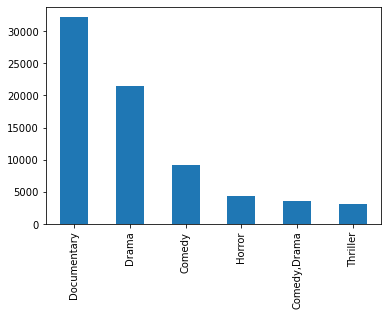

In [12]:
# ploting genre counts
genre_counts.plot.bar()

### Documentary and Drama are the most produced

In [13]:
q = """
SELECT movie_id,primary_title,start_year,averagerating,numvotes 
FROM movie_ratings
JOIN movie_basics
 USING(movie_id);"""

pd.read_sql(q,conn)

,movie_id,primary_title,start_year,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,2019,8.3,31
1,tt10384606,Borderless,2019,8.9,559
2,tt1042974,Just Inès,2010,6.4,20
3,tt1043726,The Legend of Hercules,2014,4.2,50352
4,tt1060240,Até Onde?,2011,6.5,21
...,...,...,...,...,...
73851,tt9805820,Caisa,2018,8.1,25
73852,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,2018,7.5,24
73853,tt9851050,Sisters,2019,4.7,14
73854,tt9886934,The Projectionist,2019,7.0,5


In [14]:
# choosing the columns of interest from movie_basics
q = (""" 
SELECT movie_id,primary_title,start_year
FROM movie_basics;""")

new_movie_basics =pd.read_sql(q,conn)
new_movie_basics

,movie_id,primary_title,start_year
0,tt0063540,Sunghursh,2013
1,tt0066787,One Day Before the Rainy Season,2019
2,tt0069049,The Other Side of the Wind,2018
3,tt0069204,Sabse Bada Sukh,2018
4,tt0100275,The Wandering Soap Opera,2017
...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015
146141,tt9916706,Dankyavar Danka,2013
146142,tt9916730,6 Gunn,2017


In [15]:
new_movie_basics.isna().sum()

movie_id         0
primary_title    0
start_year       0
dtype: int64

# Movies data

In [16]:
# reading movie data
movies = pd.read_csv("tmdb.movies.csv")
movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [17]:
movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [18]:
# checking for duplicates
movies.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [19]:
# knowing the counts of language
language_count = movies["original_language"].value_counts()[:6]
language_count

en    23291
fr      507
es      455
ru      298
ja      265
de      237
Name: original_language, dtype: int64

<AxesSubplot:>

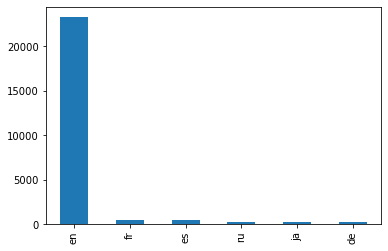

In [20]:
# ploting language counts 
language_count.plot.bar()

#### The above plot shows the most used language in production

# # MOVIE_BUDGETS DATASET

In [21]:
# reading our csv file
movie_budgetsdf = pd.read_csv("tn.movie_budgets.csv")
movie_budgetsdf

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [22]:
# viewing first 5 rows of data
movie_budgetsdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
# checking number of rows and columns
movie_budgetsdf.shape

(5782, 6)

In [24]:
# checking start and ending point of our dataset
movie_budgetsdf.index

RangeIndex(start=0, stop=5782, step=1)

In [25]:
# checking more information about our data such as data types
movie_budgetsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
# checking out for missing values
# .isnull().sum().sort_values(ascending = False)
movie_budgetsdf.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [27]:
# checking for duplicates
movie_budgetsdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [28]:
# viewing movie_budgetsdf
movie_budgetsdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
# creating a new column release_month
movie_budgetsdf['release_month'] = \
        pd.DatetimeIndex(movie_budgetsdf['release_date']).month


In [30]:
# observing new column
movie_budgetsdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12


In [31]:
counts_release_time = movie_budgetsdf["release_month"].value_counts().head()
counts_release_time

12    745
10    573
8     496
9     493
11    486
Name: release_month, dtype: int64

In [32]:
# creating a new column 
movie_budgetsdf['release_date'] = pd.to_datetime\
                                (movie_budgetsdf['release_date'])

In [34]:
# converting data object into integer
